# Neuroscience 301
# Python Crash Course
## Part 3 - Plotting and Exploratory Data Analysis
### Content
[Section 1 - Intro to matplotlib](#Section1)<br/>
<br/><br/><br/>
In this notebook we are going to go over the basics of plotting in Python. There are many different plotting libraries in Python but by far the most popular is matplotlib and that is what we will be going over. Matplotlib is extremely customizable (to a fault) and with that comes serious plotting power. We will be going over how to use fairly basic plotting features today such as scatter plots, line plots, and some beautification we can do.

To get started we an import matplotlib by calling <code>import matplotlib.pyplot as plt</code>  

In [172]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [173]:
# Some other imports we need
import numpy as np
import scipy.signal as signal
from scipy.io import loadmat

It should go without saying that if we want to make a plot we need some data to visualize. This data will almost always take the form of a numpy array but matplotlib can also work with lists.</br></br> Lets try plotting a line. To plot a line in 2d we need to specify the points along the x axis and the corresponding points along the y axis. To do this we will use the matplotlib plot function by calling <code>plt.plot(xvals, yvals)</code>

x-values: [0. 1. 2. 3. 4. 5.]
y-values: [ 2.  5.  8. 11. 14. 17.]


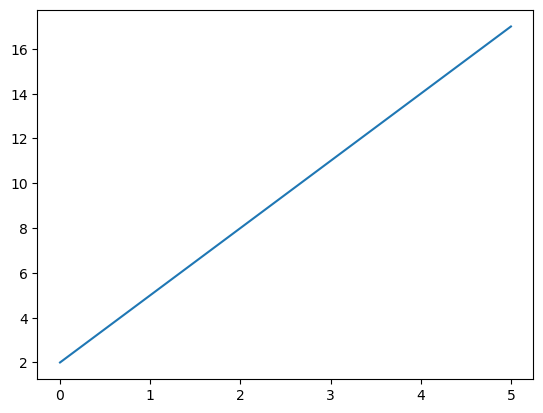

In [181]:
x = np.linspace(0, 5, 6)
m = 3
b = 2
y = m * x + b
print(f'x-values: {x}')
print(f'y-values: {y}')
plt.plot(x, y)
plt.show()

By default matplotlib interpolates between the points passed to <code>plt.plot</code> by drawing a line between them. This means that the order or the arrays matters. Look at the plot below to see what I mean

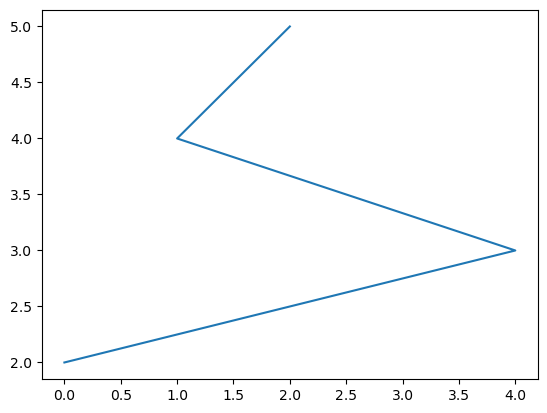

In [176]:
x = [0, 4, 1, 2]
y = [2, 3, 4, 5]
plt.plot(x, y)
plt.show()

Let's go back to our first figure and incrementally improve it. To do this we can call several matplotlib functions before we call <code>plt.show()</code> to display our plot

x-values: [0. 1. 2. 3. 4. 5.]
y-values: [ 2.  5.  8. 11. 14. 17.]


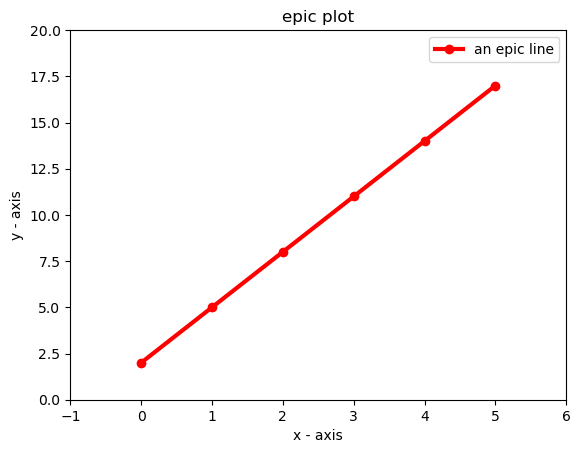

In [205]:
x = np.linspace(0, 5, 6)
m = 3
b = 2
y = m * x + b
print(f'x-values: {x}')
print(f'y-values: {y}')
plt.plot(x, y, marker='o', color='red', lw=3, label='an epic line')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.ylim(bottom=0, top=20)
plt.xlim(left=-1, right=6)
plt.title('epic plot')
plt.legend()
plt.show()

We can also have multiple lines on the same plot by calling <code>plt.plot</code> again before displaying.

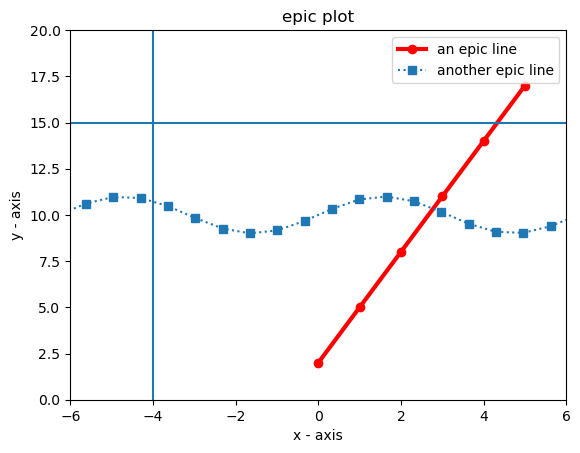

In [213]:
x1 = np.linspace(0, 5, 6)
m = 3
b = 2
y1 = m * x + b

x2 = np.linspace(-2*np.pi, 2*np.pi, 20)
y2 = np.sin(x2) + 10

# Lines
plt.plot(x1, y1, marker='o', color='red', lw=3, label='an epic line')
plt.plot(x2, y2, marker='s', linestyle=':', label='another epic line')
plt.axhline(y=15) # Plots horizontal line
plt.axvline(x=-4) # Plots vertical line

# Beautification
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.ylim(bottom=0, top=20)
plt.xlim(left=-6, right=6)
plt.title('epic plot')
plt.legend()

# Displaying
plt.show()

Matplotlib can plot much more than just lines. For a comprehensive list check out the [matplotlib documentation](https://matplotlib.org/stable/api/pyplot_summary.html). Lets just go over a few that you will frequently use.

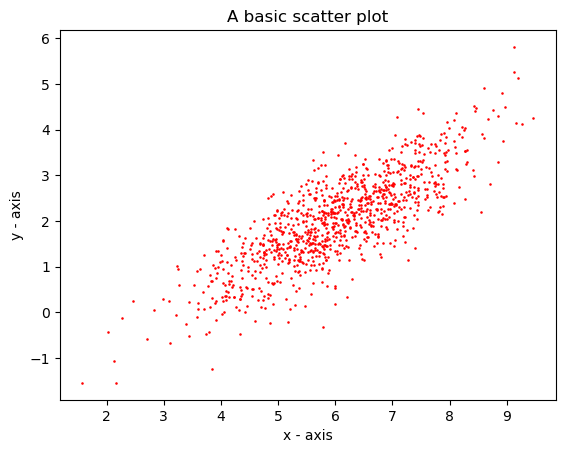

In [269]:
# Generate 1000 points from a 2d normal distribution
scatter_points = np.random.multivariate_normal(mean=[6, 2], cov=[[1.5, 1], [1, 1]], size=1000)

# Get x and y positions by splitting the columns
x_positions = scatter_points[:, 0]
y_positions = scatter_points[:, 1]


plt.scatter(x_positions, y_positions, s=0.7, c='red')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('A basic scatter plot')
plt.show()

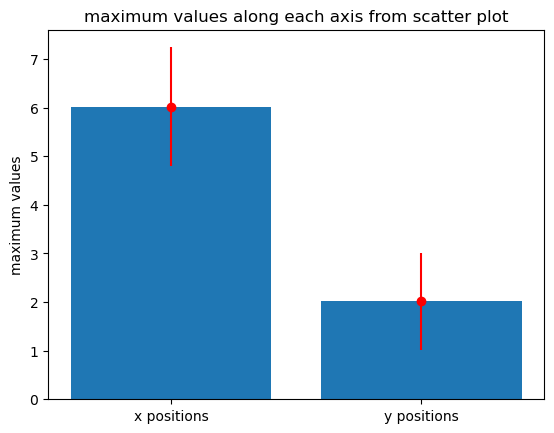

In [272]:
x_mean = x_positions.mean()
x_sd = x_positions.std()
y_mean = y_positions.mean()
y_sd = y_positions.std()


plt.bar(x=[0, 1], height=[x_mean, y_mean])
plt.errorbar(x=[0, 1], y=[x_mean, y_mean], yerr=[x_sd, y_sd], fmt='o', color='red')

plt.xticks(ticks=[0, 1], labels=['x positions', 'y positions'])
plt.ylabel('maximum values')
plt.title('maximum values along each axis from scatter plot')
plt.show()

In [155]:
def split_channels(mat: dict):
    data = mat['data']
    length = data.shape[1]
    return data[0, :length//2], data[0, length//2:]

In [156]:
data = loadmat('spontaneous.mat')

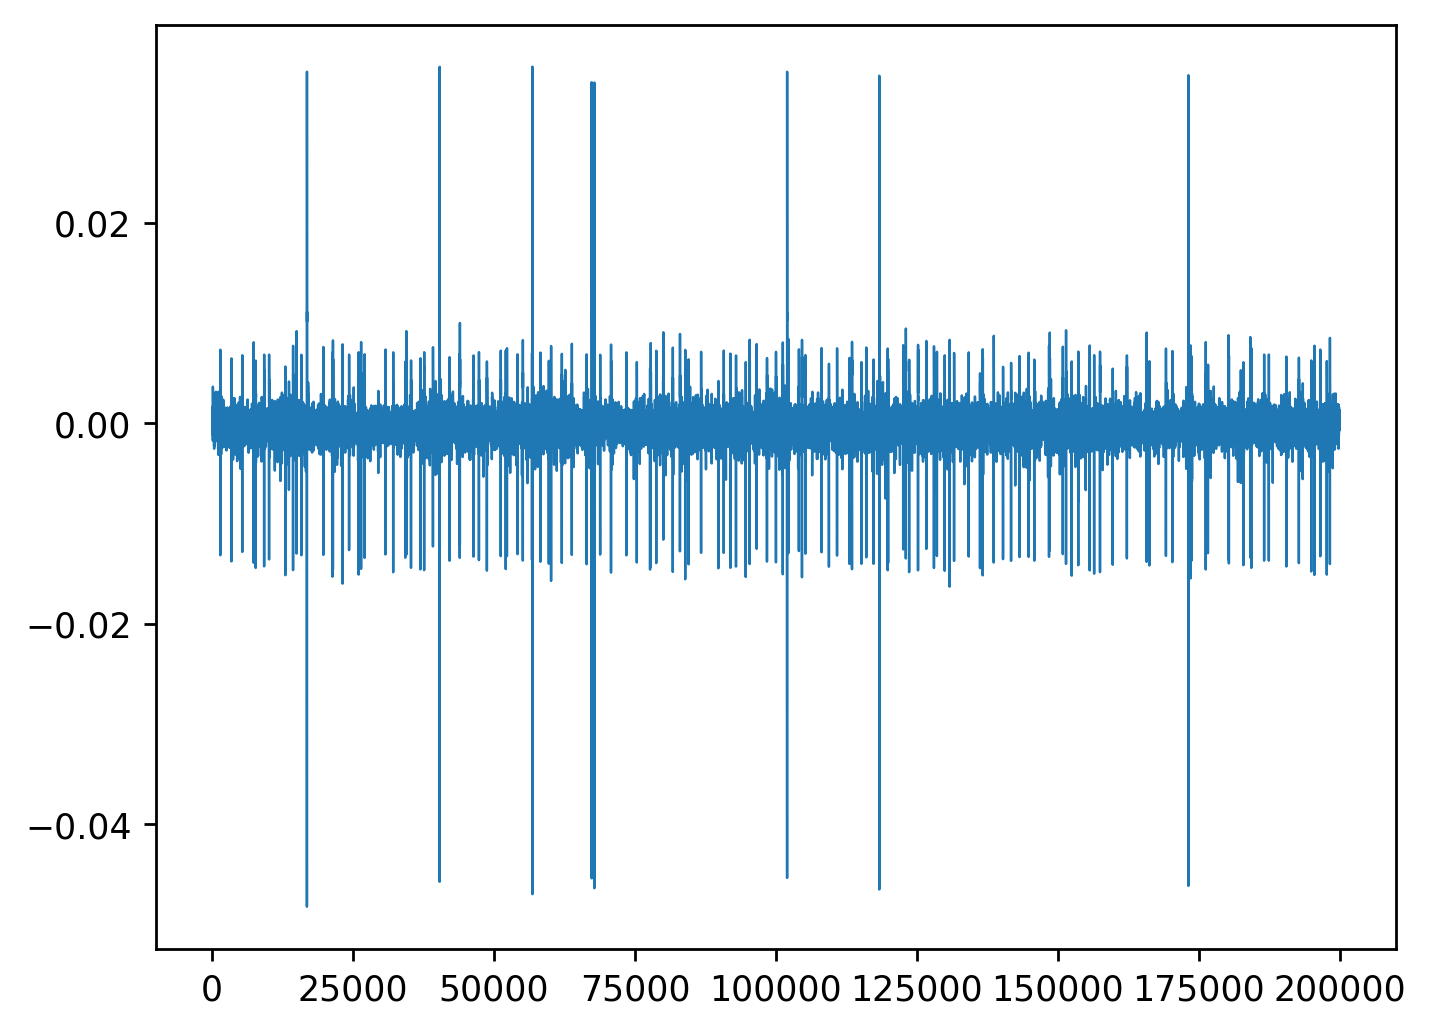

In [157]:
plt.plot(data['data'][0], lw=0.7)

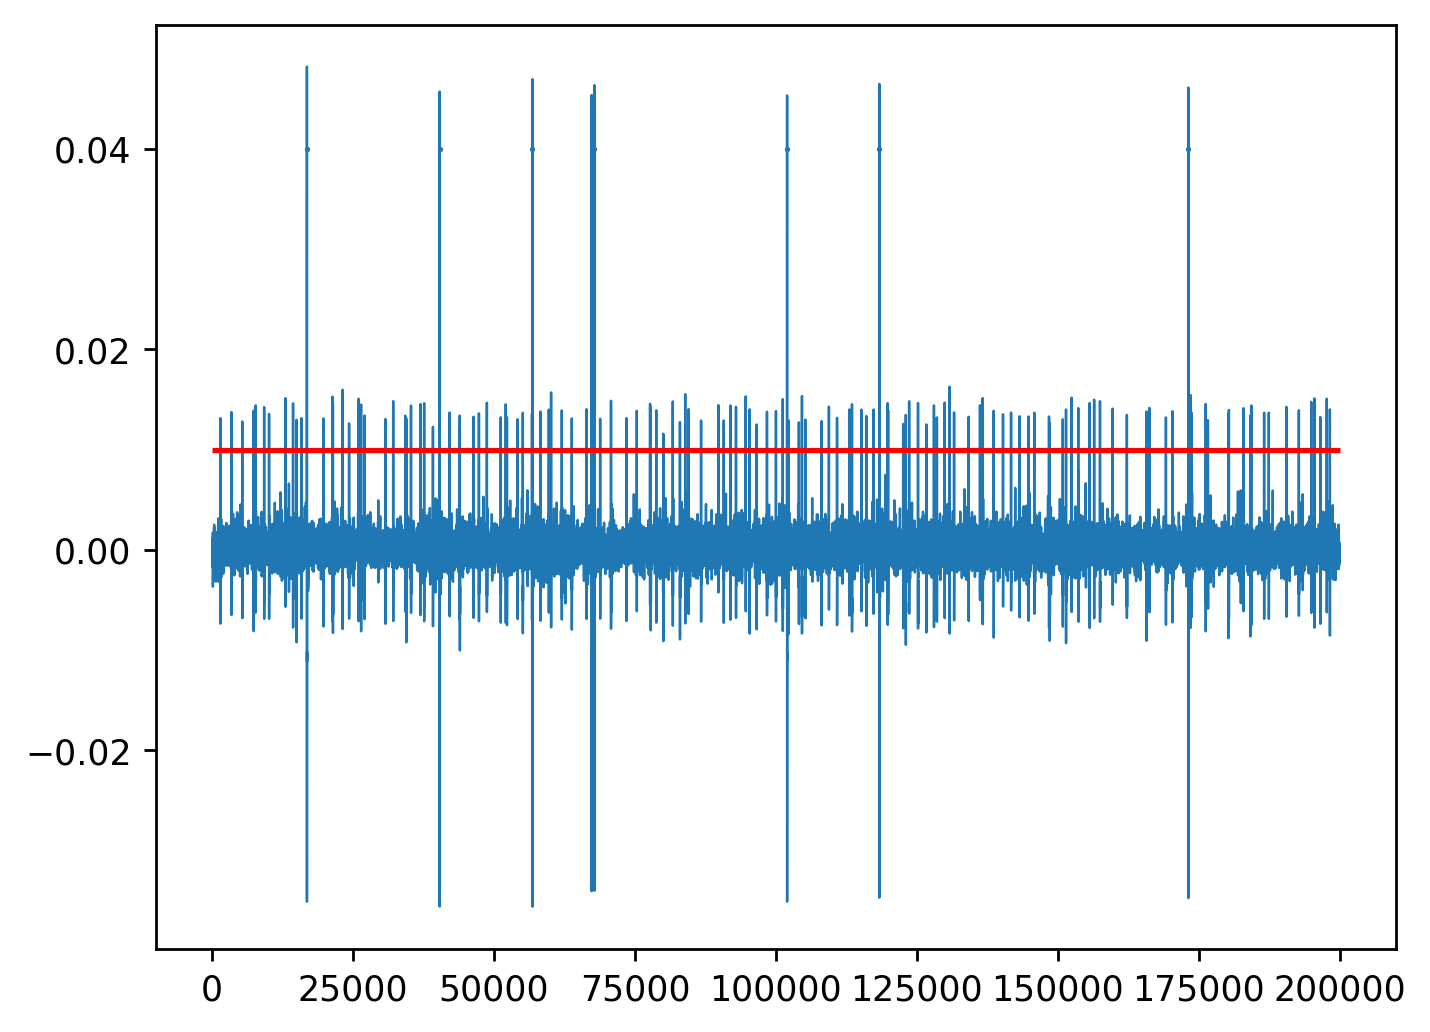

In [158]:
data = -1 * data['data'][0]

peaks, _ = signal.find_peaks(data, height=0.02)
plt.plot(data, lw=0.7)
plt.hlines(0.01, 0, 200000, color='r')
plt.scatter(peaks, np.zeros_like(peaks)+0.04, s=0.3)

In [159]:
peaks, properties = signal.find_peaks(data, height=(None, None), width=(None, None), distance=10)

In [160]:
heights, widths = properties['peak_heights'], properties['widths']
widths.mean()

6.652281888296045

In [161]:
heights, widths = properties['peak_heights'], properties['widths']

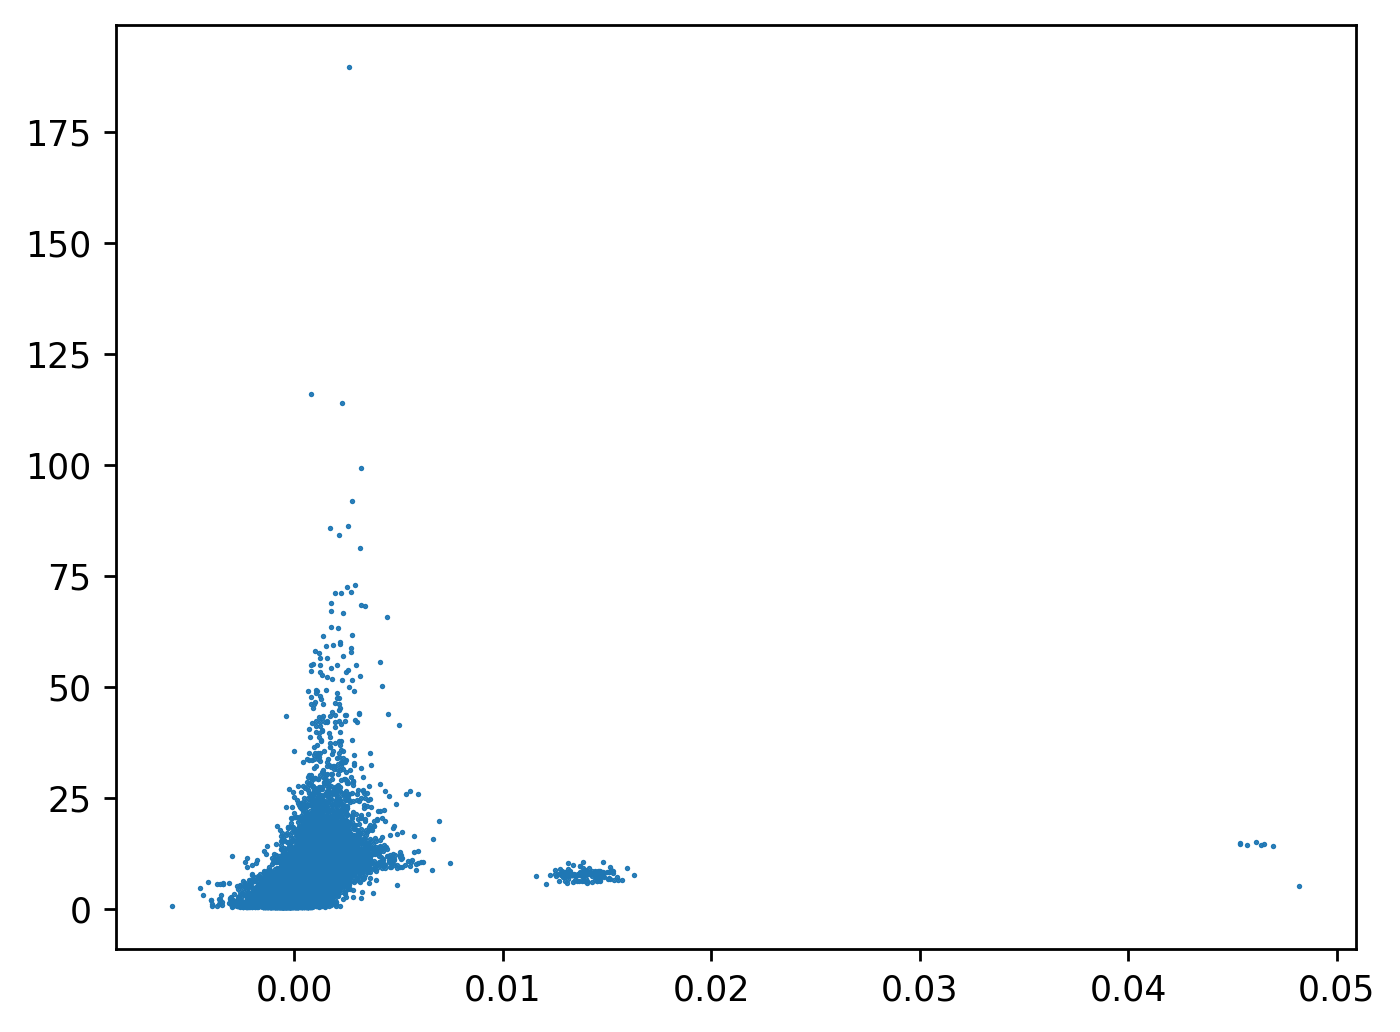

In [162]:
plt.rcParams['figure.dpi'] = 250
plt.scatter(heights, widths, s=0.3)

In [163]:
height_mask = (heights > 0.01) & (heights < 0.02)
width_mask = (widths > 0) & (widths < 25)

indices = np.logical_and(height_mask, width_mask)
peaks_of_interest = peaks[indices]

In [164]:
waveforms = np.zeros((peaks_of_interest.shape[0], 35))
for idx, spike in enumerate(peaks_of_interest):
    waveforms[idx] = data[spike - 10: spike + 25]

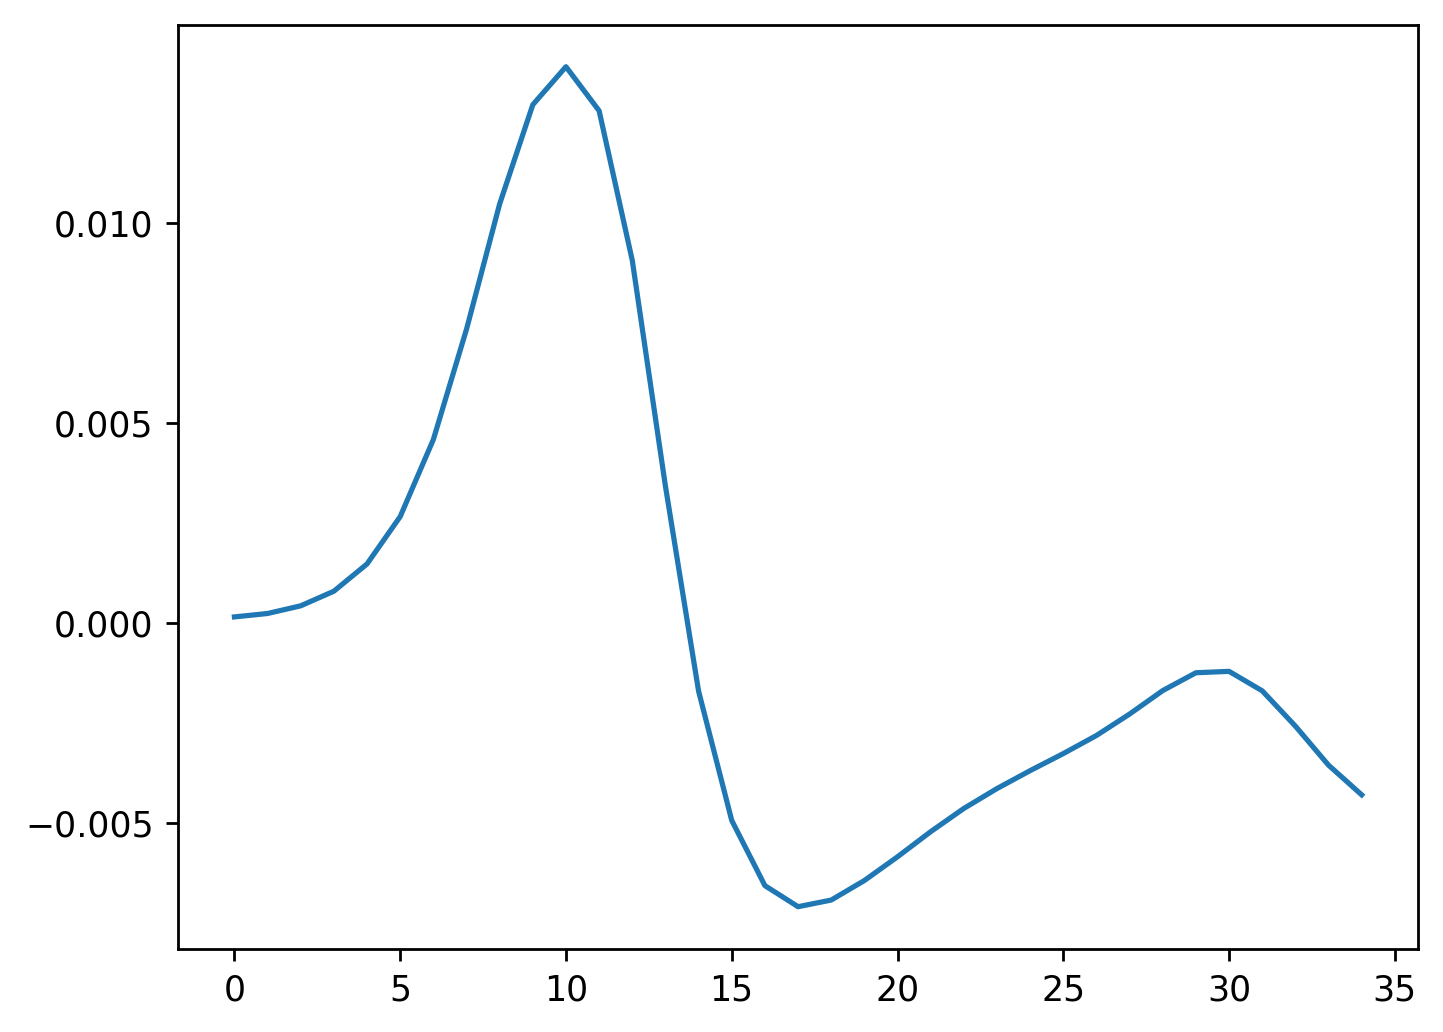

In [165]:

plt.plot(waveforms.mean(0))